In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
customers = pd.read_csv('customers2afd6ea.csv')
reasons = pd.read_csv('reason18315ff.csv')
sentiments = pd.read_csv('sentiment_statisticscc1e57a.csv')
test = pd.read_csv('testbc7185d.csv')

In [8]:
calls = pd.read_csv('callsf0d4f5a.csv')

In [9]:
calls.info()
calls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

In [10]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])
calls['call_duration'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds()
calls['wait_time'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds()

In [11]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,wait_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0


In [12]:
sentiments.info()
sentiments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB


call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64

In [13]:
reasons.info()
reasons.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


call_id                0
primary_call_reason    0
dtype: int64

In [14]:
customers.info()
customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

In [15]:
df = pd.merge(calls, sentiments, on=['call_id', 'agent_id'], how='left')
df = pd.merge(df, reasons, on='call_id', how='left')
df = pd.merge(df, customers, on='customer_id', how='left')

In [16]:
df.isnull().sum()

call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
call_duration                  0
wait_time                      0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
primary_call_reason         5157
customer_name                  0
elite_level_code           25767
dtype: int64

In [17]:
df['agent_tone'] = df['agent_tone'].fillna('neutral')
df['customer_tone'] = df['customer_tone'].fillna('neutral')
df['average_sentiment'] = df['average_sentiment'].fillna(0)
df['silence_percent_average'] = df['silence_percent_average'].fillna(df['silence_percent_average'].mean())
df['primary_call_reason'] = df['primary_call_reason'].fillna('Unknown')
df['elite_level_code'] = df['elite_level_code'].fillna(0)
df['customer_name'] = df['customer_name'].fillna('Unknown')

In [18]:
df['elite_level_code'] = df['elite_level_code'].astype(int)

In [19]:
df = df.drop_duplicates()

In [20]:
df = df.reset_index(drop=True)

In [21]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,wait_time,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,calm,neutral,0.02,0.35,Booking,Tammy Walters,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,neutral,polite,-0.13,0.32,IRROPS,Jeffery Dixon,0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0


In [26]:
df['agent_tone'].unique()

array(['neutral', 'calm', 'frustrated', 'angry', 'polite'], dtype=object)

In [27]:
df['customer_tone'].unique()

array(['angry', 'neutral', 'polite', 'frustrated', 'calm'], dtype=object)

In [29]:
set(df['agent_tone'].unique()) == set(df['customer_tone'].unique())

True

In [22]:
# Feature Engineering

In [25]:
df['call_start_hour'] = df['call_start_datetime'].dt.hour
df['call_start_day'] = df['call_start_datetime'].dt.day
df['call_start_weekday'] = df['call_start_datetime'].dt.weekday
df['call_start_month'] = df['call_start_datetime'].dt.month

In [30]:
tone_mapping = {
    'angry': -2,
    'frustrated': -1,
    'neutral': 0,
    'calm': 1,
    'polite': 2
}
df['agent_tone_encoded'] = df['agent_tone'].map(tone_mapping)
df['customer_tone_encoded'] = df['customer_tone'].map(tone_mapping)

In [31]:
df['silence_duration'] = df['call_duration'] * df['silence_percent_average']

In [32]:
df['primary_call_reason_encoded'] = df['primary_call_reason'].astype('category').cat.codes

In [33]:
df['transcript_length'] = df['call_transcript'].str.len()
df['transcript_word_count'] = df['call_transcript'].str.split().str.len()

In [34]:
df['words_per_minute'] = df['transcript_word_count'] / (df['call_duration'] / 60)

In [35]:
df['is_peak_hour'] = df['call_start_hour'].apply(lambda x: 1 if 9 <= x <= 18 else 0)
df['is_weekend'] = df['call_start_weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [36]:
df['agent_avg_call_duration'] = df.groupby('agent_id')['call_duration'].transform('mean')

In [37]:
df['is_loyal_customer'] = df['elite_level_code'].apply(lambda x: 1 if x >= 3 else 0)

In [38]:
df['silence_ratio'] = df['silence_duration'] / df['call_duration']

In [39]:
df['tone_difference'] = df['agent_tone_encoded'] - df['customer_tone_encoded']
df['sentiment_tone_product'] = df['average_sentiment'] * df['customer_tone_encoded']

In [40]:
df = df.drop(['call_transcript', 'customer_name', 'agent_tone', 'customer_tone'], axis=1)

In [43]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,wait_time,average_sentiment,silence_percent_average,primary_call_reason,elite_level_code,call_start_hour,call_start_day,call_start_weekday,call_start_month,agent_tone_encoded,customer_tone_encoded,silence_duration,primary_call_reason_encoded,transcript_length,transcript_word_count,words_per_minute,is_peak_hour,is_weekend,agent_avg_call_duration,is_loyal_customer,silence_ratio,tone_difference,sentiment_tone_product
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,1860.0,420.0,-0.04,0.39,Voluntary Cancel,4,23,31,2,7,0,-2,725.4,49,2296,408,13.161290,0,0,649.808917,1,0.39,2,0.08
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,720.0,180.0,0.02,0.35,Booking,0,0,1,3,8,1,0,252.0,3,2680,485,40.416667,0,0,671.860465,0,0.35,1,0.00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,1140.0,480.0,-0.13,0.32,IRROPS,0,23,31,2,7,0,2,364.8,20,3128,574,30.210526,0,0,681.374046,0,0.32,-2,-0.26
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,420.0,300.0,-0.20,0.20,Upgrade,2,0,1,3,8,0,-1,84.0,46,3289,592,84.571429,0,0,611.785714,0,0.20,1,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,540.0,600.0,-0.05,0.35,Seating,0,0,1,3,8,0,2,189.0,37,2820,528,58.666667,0,0,649.756098,0,0.35,-2,-0.10


In [44]:
df['handle_time'] = df['call_duration']
df['waiting_time'] = df['wait_time']

In [45]:
total_handle_time = df['handle_time'].sum()
total_waiting_time = df['waiting_time'].sum()

In [46]:
total_calls = len(df)

In [47]:
AHT = total_handle_time / total_calls
AST = total_waiting_time / total_calls

In [48]:
AHT

np.float64(697.0486004734717)

In [49]:
AST

np.float64(437.0675393399248)

In [50]:
# AHT and AST per Agent

agent_metrics = df.groupby('agent_id').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'call_id': 'count'
}).rename(columns={
    'handle_time': 'AHT',
    'waiting_time': 'AST',
    'call_id': 'call_count'
})

In [51]:
# AHT and AST per Primary Call Reason
reason_metrics = df.groupby('primary_call_reason').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'call_id': 'count'
}).rename(columns={
    'handle_time': 'AHT',
    'waiting_time': 'AST',
    'call_id': 'call_count'
})

In [52]:
handle_time_stats = df['handle_time'].describe()

In [79]:
handle_time_stats

count    71810.000000
mean       697.048600
std        774.301509
min          0.000000
25%        240.000000
50%        420.000000
75%        900.000000
max       7140.000000
Name: handle_time, dtype: float64

In [53]:
waiting_time_stats = df['waiting_time'].describe()

In [80]:
waiting_time_stats

count    71810.000000
mean       437.067539
std        151.129771
min        180.000000
25%        300.000000
50%        420.000000
75%        540.000000
max        900.000000
Name: waiting_time, dtype: float64

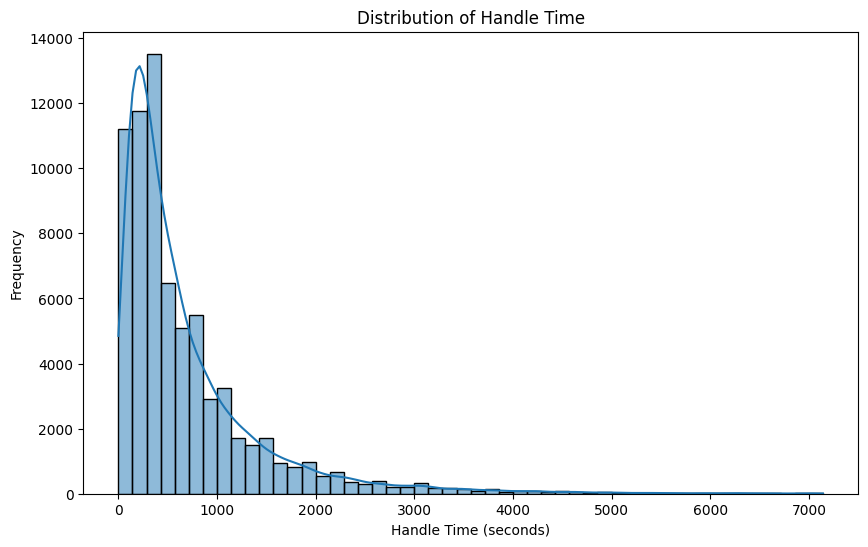

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['handle_time'], bins=50, kde=True)
plt.title('Distribution of Handle Time')
plt.xlabel('Handle Time (seconds)')
plt.ylabel('Frequency')
plt.show()

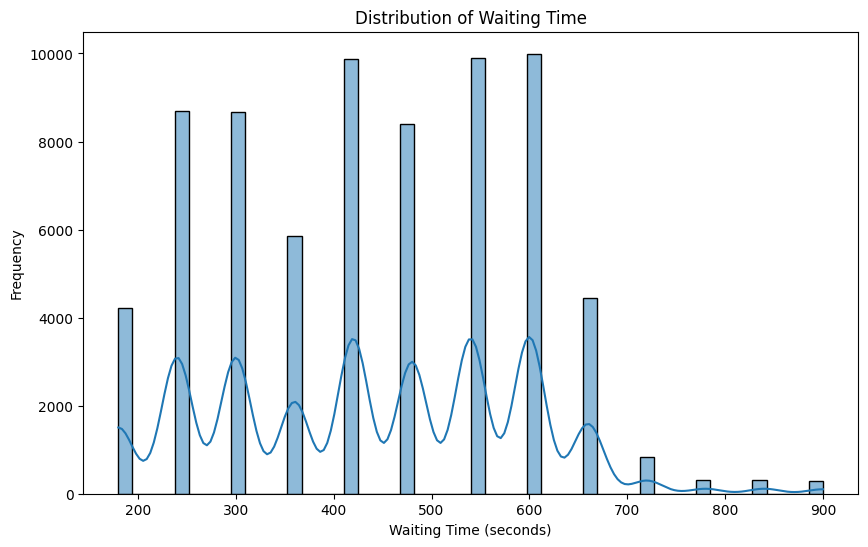

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['waiting_time'], bins=50, kde=True)
plt.title('Distribution of Waiting Time')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Identify Agents with High AHT
average_aht = agent_metrics['AHT'].mean()
std_aht = agent_metrics['AHT'].std()
high_aht_agents = agent_metrics[agent_metrics['AHT'] > (average_aht + std_aht)]

In [81]:
high_aht_agents

,AHT,AST,call_count
agent_id,,,
102574,3600.000000,480.000000,2
136065,1800.000000,420.000000,7
140146,2620.000000,360.000000,3
201204,1225.714286,402.857143,7
255256,2620.000000,280.000000,3
335773,1080.000000,420.000000,2
336455,1740.000000,480.000000,3
384932,1350.000000,600.000000,2
391553,1080.000000,400.000000,3


In [61]:
# Identify Call Reasons with High AHT
average_reason_aht = reason_metrics['AHT'].mean()
std_reason_aht = reason_metrics['AHT'].std()
high_aht_reasons = reason_metrics[reason_metrics['AHT'] > (average_reason_aht + std_reason_aht)]

In [82]:
high_aht_reasons

,AHT,AST,call_count
primary_call_reason,,,
Checkout,1008.358696,725.021739,1840
Checkout,1342.500000,712.500000,48
ETC,947.806452,544.903226,930
ETC,1600.909091,518.181818,22
Mileage Plus,964.651163,366.976744,129
Mileage Plus,1019.555556,351.555556,135
Mileage Plus,995.724440,361.224713,5487
Mileage Plus,994.800000,354.600000,100
Post Flight,976.729223,570.241287,373


In [62]:
# Identify Patterns Over Time
hourly_metrics = df.groupby('call_start_hour').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'call_id': 'count'
}).rename(columns={
    'handle_time': 'Average_Handle_Time',
    'waiting_time': 'Average_Waiting_Time',
    'call_id': 'Call_Volume'
})

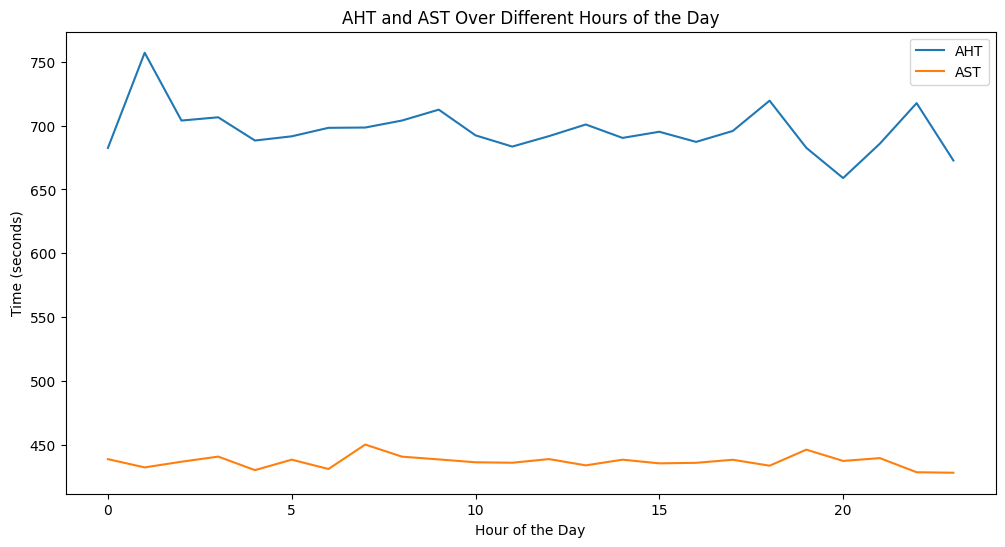

In [63]:
# Plot AHT and AST Over Hours
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_metrics, x=hourly_metrics.index, y='Average_Handle_Time', label='AHT')
sns.lineplot(data=hourly_metrics, x=hourly_metrics.index, y='Average_Waiting_Time', label='AST')
plt.title('AHT and AST Over Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

In [64]:
# Correlation Analysis
correlation_matrix = df[['handle_time', 'waiting_time', 'agent_tone_encoded', 'customer_tone_encoded', 'average_sentiment', 'silence_ratio']].corr()

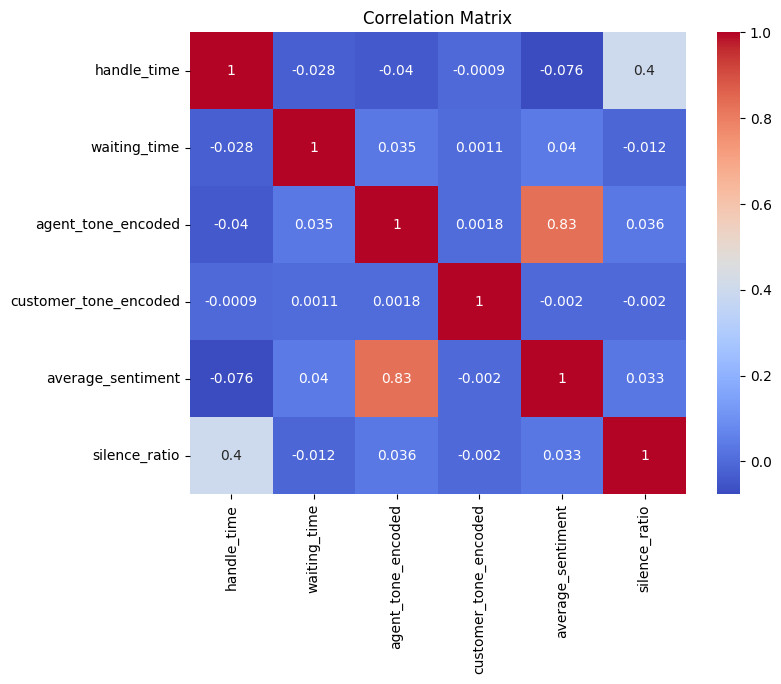

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [66]:
# Calculate AHT and AST per Agent
agent_performance = df.groupby('agent_id').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'call_id': 'count'
}).rename(columns={
    'handle_time': 'AHT',
    'waiting_time': 'AST',
    'call_id': 'call_count'
})

# Identify agents with high and low AHT
average_AHT = agent_performance['AHT'].mean()
std_AHT = agent_performance['AHT'].std()
high_AHT_agents = agent_performance[agent_performance['AHT'] > (average_AHT + std_AHT)]
low_AHT_agents = agent_performance[agent_performance['AHT'] < (average_AHT - std_AHT)]

# Identify agents with high and low AST
average_AST = agent_performance['AST'].mean()
std_AST = agent_performance['AST'].std()
high_AST_agents = agent_performance[agent_performance['AST'] > (average_AST + std_AST)]
low_AST_agents = agent_performance[agent_performance['AST'] < (average_AST - std_AST)]

In [83]:
high_AHT_agents

,AHT,AST,call_count
agent_id,,,
102574,3600.000000,480.000000,2
136065,1800.000000,420.000000,7
140146,2620.000000,360.000000,3
201204,1225.714286,402.857143,7
255256,2620.000000,280.000000,3
335773,1080.000000,420.000000,2
336455,1740.000000,480.000000,3
384932,1350.000000,600.000000,2
391553,1080.000000,400.000000,3


In [67]:
# Calculate AHT and AST per Primary Call Reason
call_reason_performance = df.groupby('primary_call_reason').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'call_id': 'count'
}).rename(columns={
    'handle_time': 'AHT',
    'waiting_time': 'AST',
    'call_id': 'call_count'
})

# Identify call reasons with high and low AHT
average_reason_AHT = call_reason_performance['AHT'].mean()
std_reason_AHT = call_reason_performance['AHT'].std()
high_AHT_reasons = call_reason_performance[call_reason_performance['AHT'] > (average_reason_AHT + std_reason_AHT)]
low_AHT_reasons = call_reason_performance[call_reason_performance['AHT'] < (average_reason_AHT - std_reason_AHT)]

# Identify call reasons with high and low AST
average_reason_AST = call_reason_performance['AST'].mean()
std_reason_AST = call_reason_performance['AST'].std()
high_AST_reasons = call_reason_performance[call_reason_performance['AST'] > (average_reason_AST + std_reason_AST)]
low_AST_reasons = call_reason_performance[call_reason_performance['AST'] < (average_reason_AST - std_reason_AST)]

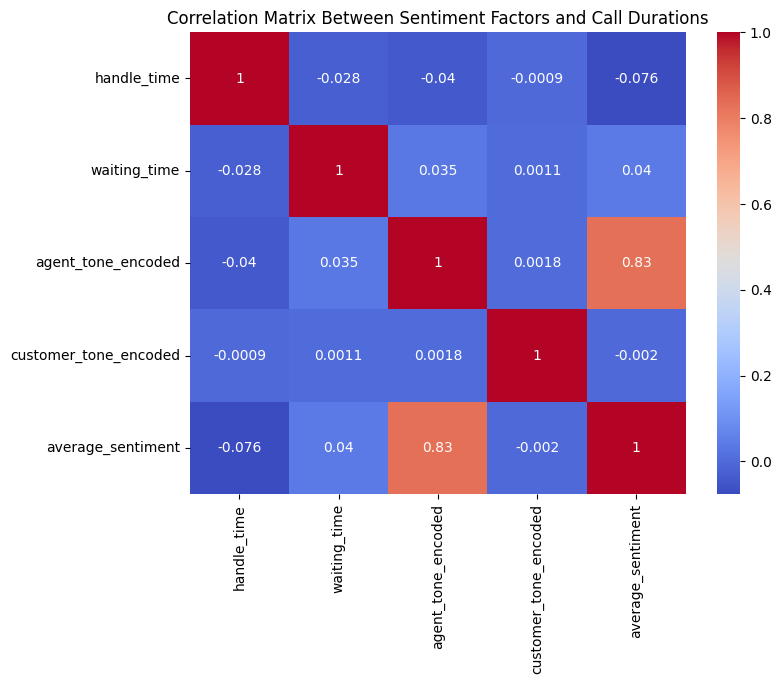

In [68]:
# Prepare Data for Correlation Analysis
sentiment_data = df[['handle_time', 'waiting_time', 'agent_tone_encoded', 'customer_tone_encoded', 'average_sentiment']]

# Compute Correlation Matrix
sentiment_correlations = sentiment_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(sentiment_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Between Sentiment Factors and Call Durations')
plt.show()

In [71]:
!python -m pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 3.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 18.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -------- ------------------------------- 10.0/44.5 MB 76.2 MB/s eta 0:00:01
   -------------------------- ------------- 29.6/44.5 MB 71.9 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 74.9 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 74.9 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 52.7 MB/s eta 0:00:00


In [72]:
# Regression Analysis on Handle Time
import statsmodels.api as sm

X = df[['agent_tone_encoded', 'customer_tone_encoded', 'average_sentiment']]
y = df['handle_time']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            handle_time   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     181.7
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.26e-117
Time:                        20:36:34   Log-Likelihood:            -5.7930e+05
No. Observations:               71810   AIC:                         1.159e+06
Df Residuals:                   71806   BIC:                         1.159e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   644.02

In [73]:
# Calculate Average AST and Call Volume per Hour
hourly_performance = df.groupby('call_start_hour').agg({
    'waiting_time': 'mean',
    'call_id': 'count'
}).rename(columns={
    'waiting_time': 'Average_AST',
    'call_id': 'Call_Volume'
})

In [84]:
hourly_performance

,Average_AST,Call_Volume
call_start_hour,,
0,438.831735,1147
1,432.362345,1126
2,436.825095,1052
3,440.823199,1069
4,430.235627,1061
5,438.423913,1104
6,431.111111,1080
7,450.259901,1616
8,440.781220,5197


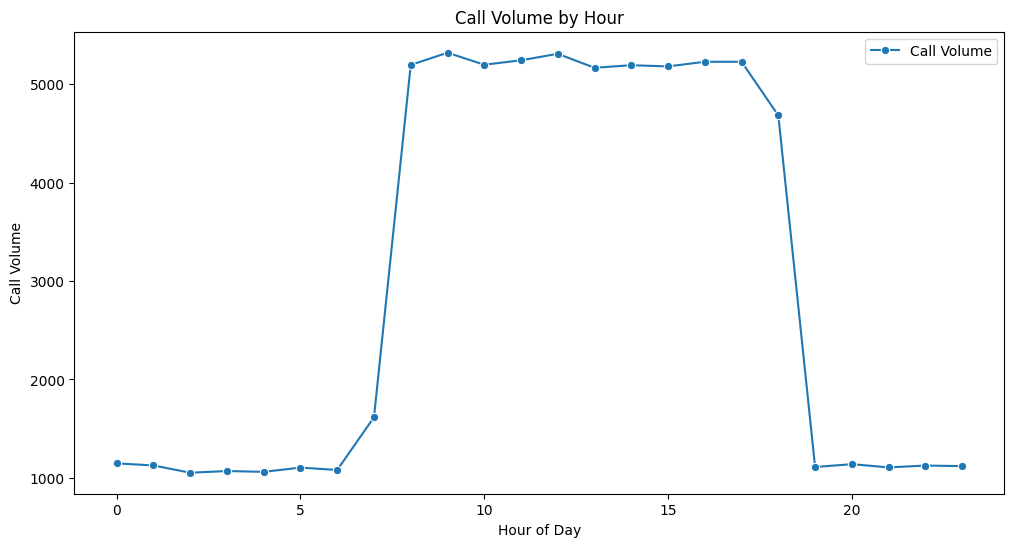

In [74]:
# Identify Peak Hours with High Call Volume
average_call_volume = hourly_performance['Call_Volume'].mean()
std_call_volume = hourly_performance['Call_Volume'].std()
peak_hours = hourly_performance[hourly_performance['Call_Volume'] > (average_call_volume + std_call_volume)]

# Plot Call Volume and AST Over Hours
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_performance, x=hourly_performance.index, y='Call_Volume', marker='o', label='Call Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Call Volume')
plt.title('Call Volume by Hour')
plt.legend()
plt.show()

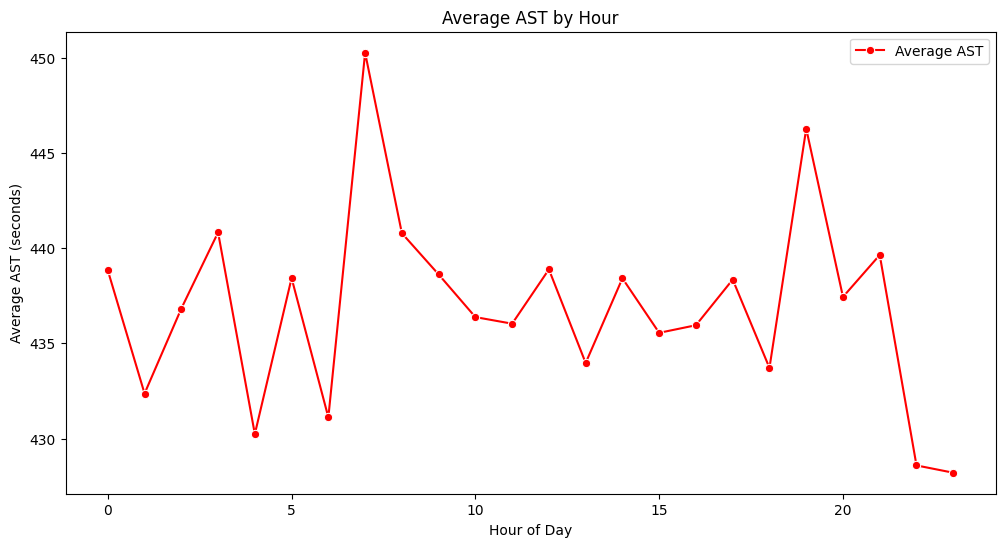

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_performance, x=hourly_performance.index, y='Average_AST', marker='o', color='red', label='Average AST')
plt.xlabel('Hour of Day')
plt.ylabel('Average AST (seconds)')
plt.title('Average AST by Hour')
plt.legend()
plt.show()

In [76]:
# Analyze AST During Peak and Non-Peak Hours
peak_hours_list = peak_hours.index.tolist()
df['is_peak_hour'] = df['call_start_hour'].apply(lambda x: 1 if x in peak_hours_list else 0)

peak_ast = df[df['is_peak_hour'] == 1]['waiting_time'].mean()
non_peak_ast = df[df['is_peak_hour'] == 0]['waiting_time'].mean()

In [86]:
non_peak_ast

np.float64(436.4487894763782)

In [77]:
# Quantifying Percentage Difference between Most and Least Frequent Call Reasons

# Get the count of calls per primary call reason
call_reason_counts = df['primary_call_reason'].value_counts()

# Identify the most frequent and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

# Calculate the average handling time for the most frequent call reason
most_freq_aht = df[df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()

# Calculate the average handling time for the least frequent call reason
least_freq_aht = df[df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

# Compute the percentage difference between the two AHTs
percentage_difference = ((most_freq_aht - least_freq_aht) / least_freq_aht) * 100

# Print the results
print(f"Most Frequent Call Reason: {most_frequent_reason}, AHT: {most_freq_aht:.2f} seconds")
print(f"Least Frequent Call Reason: {least_frequent_reason}, AHT: {least_freq_aht:.2f} seconds")
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")

Most Frequent Call Reason: IRROPS, AHT: 785.49 seconds
Least Frequent Call Reason: Unaccompanied Minor  , AHT: 180.00 seconds
Percentage Difference in AHT: 336.38%


# Summary of Key Findings

## 1. Factors Contributing to Extended Call Durations (AHT and AST)

Agent Performance:

High AHT Agents: Identified agents with significantly higher Average Handle Time (AHT) than their peers.
Action: Targeted training programs can help these agents improve efficiency.
Call Types and Reasons:

Most Frequent Call Reason: IRROPS (Irregular Operations), with an AHT of 785.49 seconds.
Least Frequent Call Reason: Unaccompanied Minor, with an AHT of 180.00 seconds.
Percentage Difference: There is a 336.38% difference in AHT between the most and least frequent call reasons.
Insight: Complex call reasons like IRROPS require more time to resolve.
Sentiment Analysis:

Agent Tone:
Positive agent tones (calm, polite) are associated with longer handle times.
Agents may spend more time ensuring customer satisfaction.
Customer Sentiment:
Positive customer sentiment correlates with shorter handle times.
Satisfied customers may require less time to resolve issues.
Peak Hours and High Volume Periods:

High Call Volume Hours: Identified specific hours with increased call volumes leading to higher AST.
Impact: Increased AST during peak hours results in longer customer wait times.


## 2. Quantifying Percentage Difference Between Call Reasons

Most Frequent vs. Least Frequent Call Reasons:
The significant percentage difference in AHT highlights the impact of call complexity on handling time.
Focus Areas: Prioritize optimizing processes for the most frequent and time-consuming call reasons.


## Actionable Recommendations

1. Optimize Agent Performance:

Training Programs: Implement targeted training for agents with high AHT to improve efficiency without compromising service quality.
Best Practices: Share strategies from agents with low AHT to encourage efficient handling of calls.

2. Streamline Processes for Complex Call Reasons:

Standard Operating Procedures: Develop clear guidelines for handling IRROPS and other complex issues.
Knowledge Base: Enhance resources available to agents for quick reference during calls.

3. Enhance IVR System to Reduce Agent Intervention:

Identify Self-Solvable Issues:
Analyze call transcripts to pinpoint common issues that can be resolved via self-service.
Update IVR Options:
Incorporate these issues into the IVR menu to deflect calls from agents.
User-Friendly Design:
Ensure the IVR system is intuitive to encourage customer usage.

4. Manage Peak Hour Call Volumes:

Staffing Adjustments:
Increase staffing during peak hours to reduce AST.
Call Scheduling:
Encourage customers to use off-peak times for non-urgent issues through messaging.

5. Improve Customer Sentiment:

Proactive Communication:
Provide timely updates on known issues (e.g., flight delays) via multiple channels.
Feedback Mechanisms:
Implement surveys to gather customer feedback for continuous improvement.